#Advertising Campaign Performance Dataset


# Ad Campaign Performance Optimization Using Predictive Analytics

 The dataset comprises detailed metrics related to advertising campaign performance, including click-through rates (CTR), revenue, clicks, impressions, and other engagement metrics. It provides valuable insights into how different campaigns perform under various conditions. The dataset includes both numerical and categorical features, making it suitable for predictive modeling and in-depth analysis.

 By leveraging this dataset, the project aims to uncover key patterns and relationships, optimize advertising strategies, and enhance campaign outcomes. The data is preprocessed to handle missing values, outliers, and skewness, ensuring it is ready for exploratory analysis and machine learning model development.

 The dataset is a rich blend of historical advertising campaign data, which enables a comprehensive understanding of performance trends. It includes attributes such as the number of clicks, impressions, and generated revenue, along with categorical features like campaign types and audience segments. These diverse features provide a solid foundation for building predictive models to forecast key performance indicators (KPIs).

 Careful preprocessing has been applied to address data quality issues, including duplicate entries and irrelevant columns, ensuring the dataset is robust for analysis. This data serves as a critical resource for identifying actionable insights and improving decision-making in marketing strategies.

## Data Preprocessing


##### step 1 : Importing Necessary Libraries
##### step 2 : Loading the Dataset
##### step 3 :Dataset Overview
##### step 4 :Handling Missing Values:
##### step 5 :Handling Duplicates
##### step 6 :Outlier Detection
##### step 7 :Skewness Analysis and Correction
##### step 8 :Data Visualization
##### step 9 :Feature Engineering:
##### step 10 :Encoding Categorical Variables:
##### step 11:Feature Standardization

### step 1 : Importing Necessary Libraries


In [8]:
import warnings 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import accuracy_score, classification_report
warnings.filterwarnings('ignore') 

### step 2 : Loading the Dataset

In [10]:
df = pd.read_csv('marketing1.csv')

In [11]:
df

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,CTR
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,0.000000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,0.783342
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,1.074757
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,1.048704
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,0.181159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000,0.000000
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494,0.447628
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000,0.000000
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000,0.000000


In [12]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,CTR
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,0.000000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,0.783342
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,1.074757
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,1.048704
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,0.181159


In [13]:
df.tail()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,CTR
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000,0.000000
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494,0.447628
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000,0.000000
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000,0.000000
15407,June,29,camp 3,High,240 x 400,def,1209,0.3184,2,0.1115,3,110.4224,0.165426


### Step 3: Dataset Overview

In [15]:
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nDataset Preview:\n", df.head())


Dataset Shape: (15408, 13)
Columns: ['month', 'day', 'campaign_number', 'user_engagement', 'banner', 'placement', 'displays', 'cost', 'clicks', 'revenue', 'post_click_conversions', 'post_click_sales_amount', 'CTR']

Dataset Preview:
    month  day campaign_number user_engagement     banner placement  displays  \
0  April    1          camp 1            High  160 x 600       abc         4   
1  April    1          camp 1            High  160 x 600       def     20170   
2  April    1          camp 1            High  160 x 600       ghi     14701   
3  April    1          camp 1            High  160 x 600       mno    171259   
4  April    1          camp 1             Low  160 x 600       def       552   

       cost  clicks   revenue  post_click_conversions  \
0    0.0060       0    0.0000                       0   
1   26.7824     158   28.9717                      23   
2   27.6304     158   28.9771                      78   
3  216.8750    1796  329.4518                     617   


### Step 4: Checking for Missing Values

In [17]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)



Missing Values:
 month                        0
day                          0
campaign_number              0
user_engagement              0
banner                       0
placement                  414
displays                     0
cost                         0
clicks                       0
revenue                      0
post_click_conversions       0
post_click_sales_amount      0
CTR                         21
dtype: int64


In [18]:
# Handling missing values
# Dropping columns with excessive null values (e.g., >50% missing)
threshold = len(df) * 0.5
df = df.loc[:, df.isnull().sum() < threshold]
print("Columns with excessive missing values removed.")

Columns with excessive missing values removed.


In [19]:
# Filling remaining missing values with appropriate values
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [20]:
print("Remaining missing values filled with median or mode.")


Remaining missing values filled with median or mode.


In [21]:
null=df.isnull().sum() # checking for null values
null

month                      0
day                        0
campaign_number            0
user_engagement            0
banner                     0
placement                  0
displays                   0
cost                       0
clicks                     0
revenue                    0
post_click_conversions     0
post_click_sales_amount    0
CTR                        0
dtype: int64

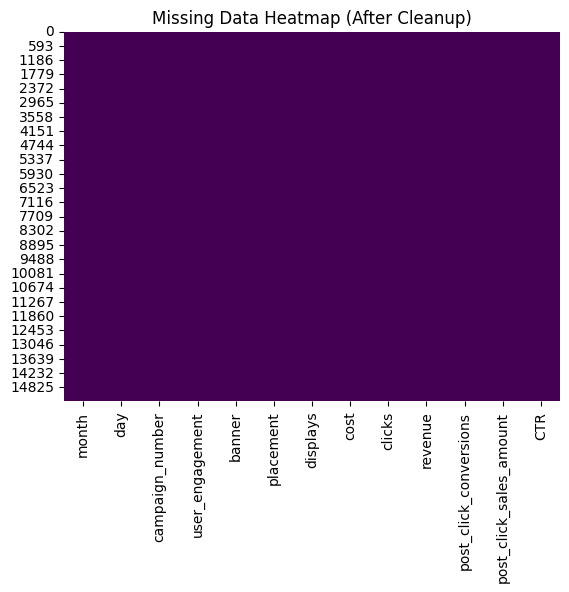

In [22]:
# Visualizing missing data post-cleanup
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap (After Cleanup)")
plt.show()

### Step 5: Handling Duplicates

In [24]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

Number of duplicate rows: 5
Duplicates removed.


### Step 6: Outlier Detection And Removal

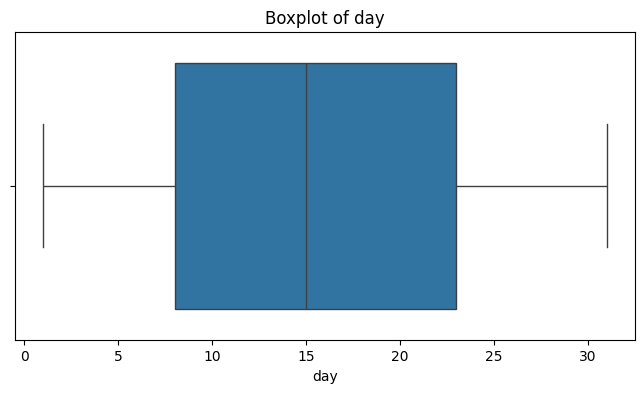

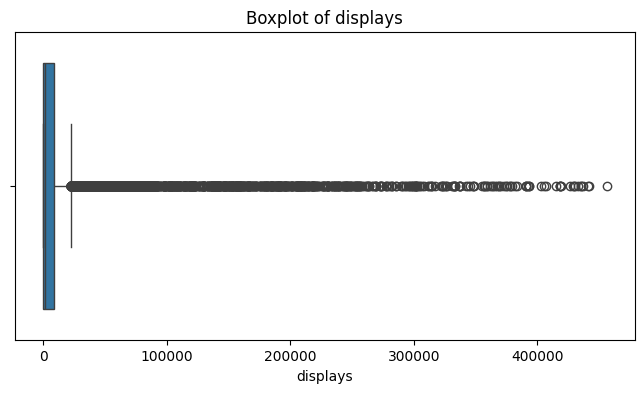

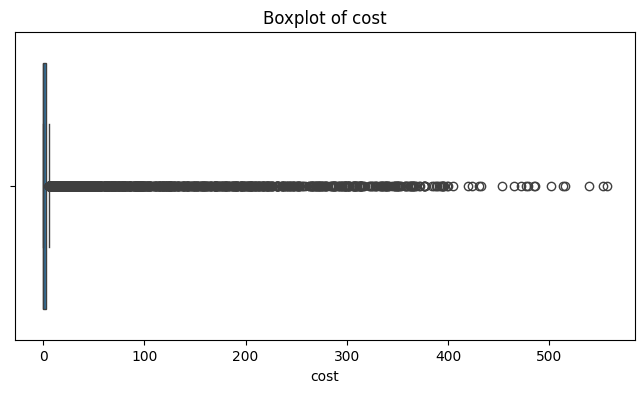

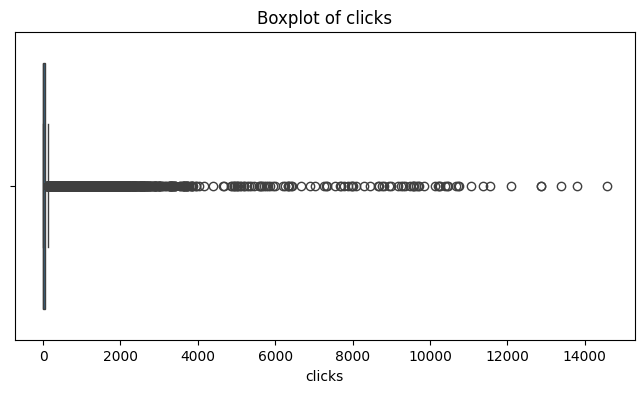

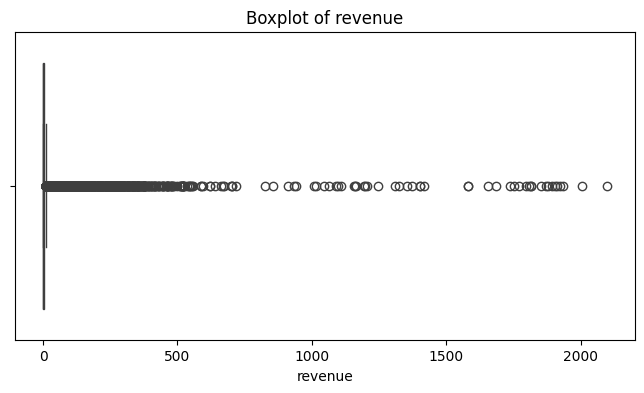

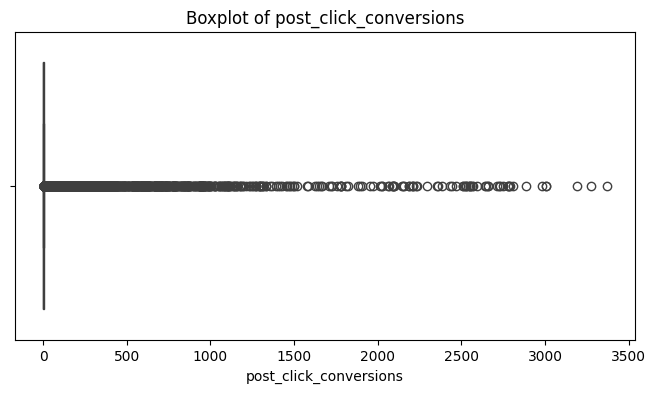

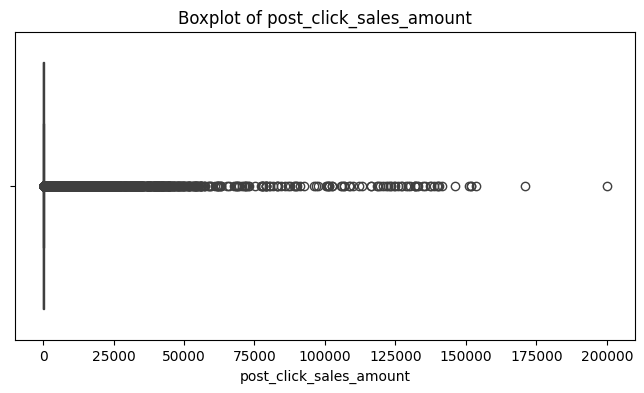

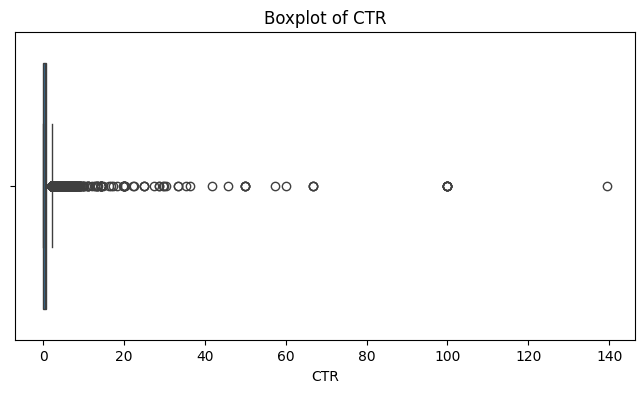

In [26]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [27]:
# Handling outliers (capping to IQR bounds)
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

print("Outliers removed or capped.")

Outliers removed or capped.


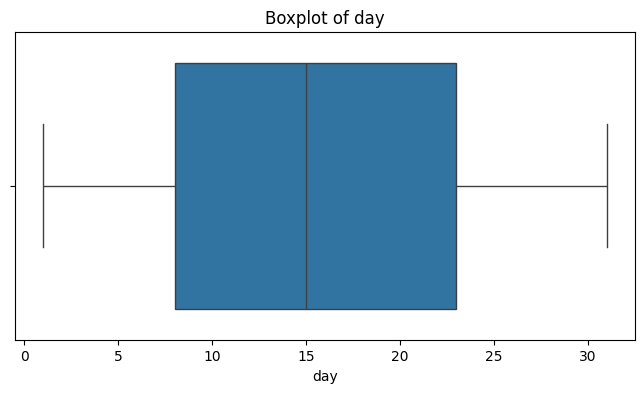

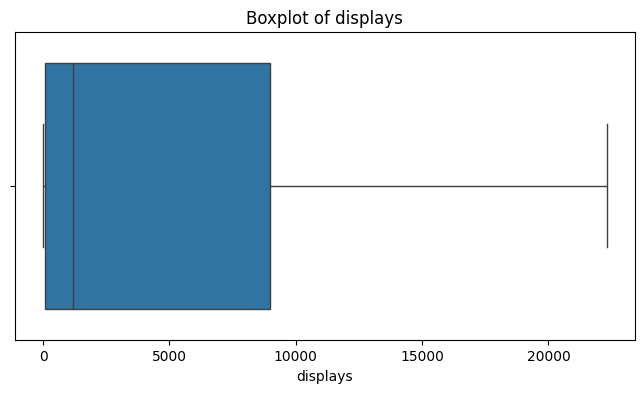

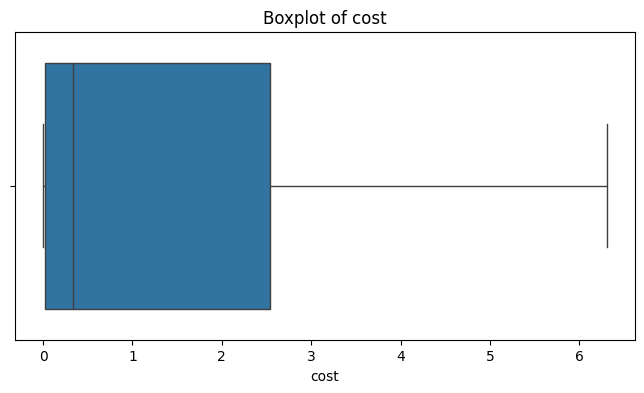

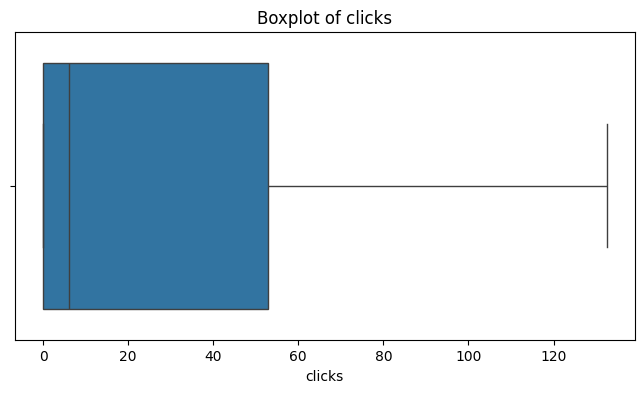

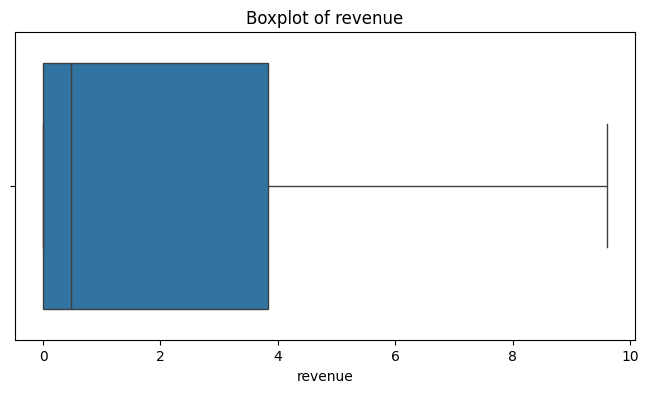

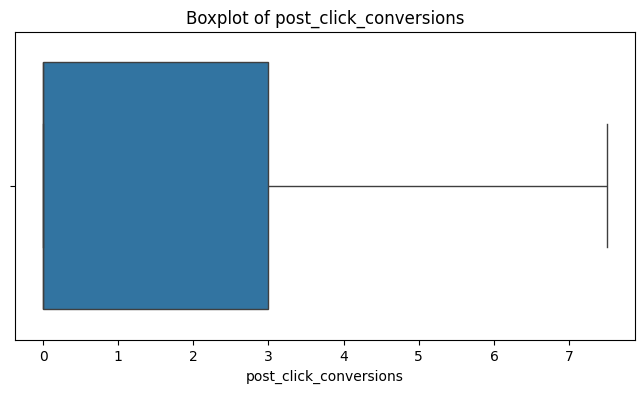

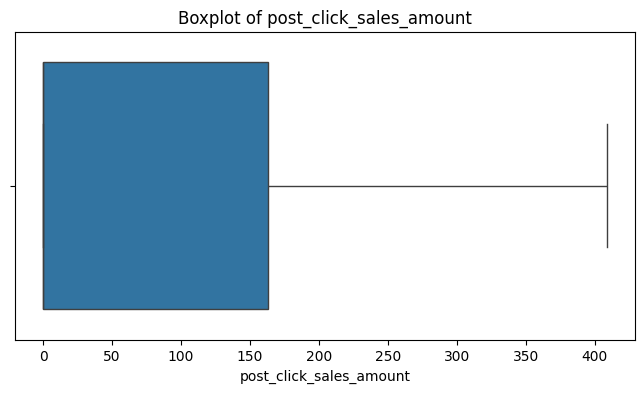

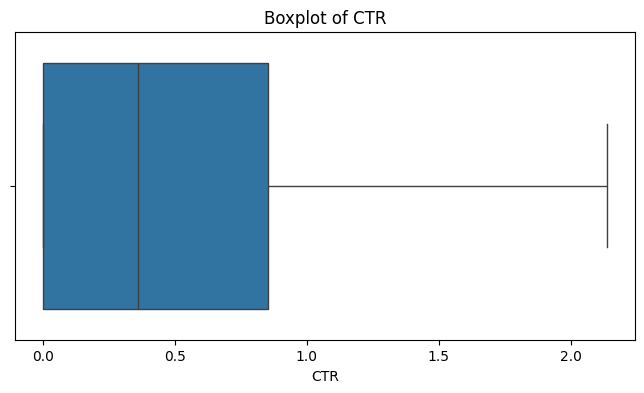

In [28]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Step 7: Data Visualization

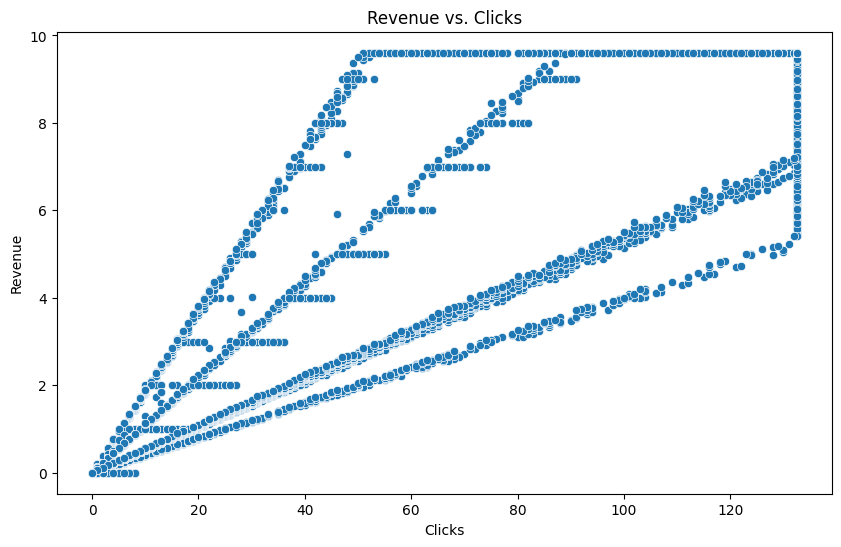

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['clicks'], y=df['revenue'])
plt.title("Revenue vs. Clicks")
plt.xlabel("Clicks")
plt.ylabel("Revenue")
plt.show()

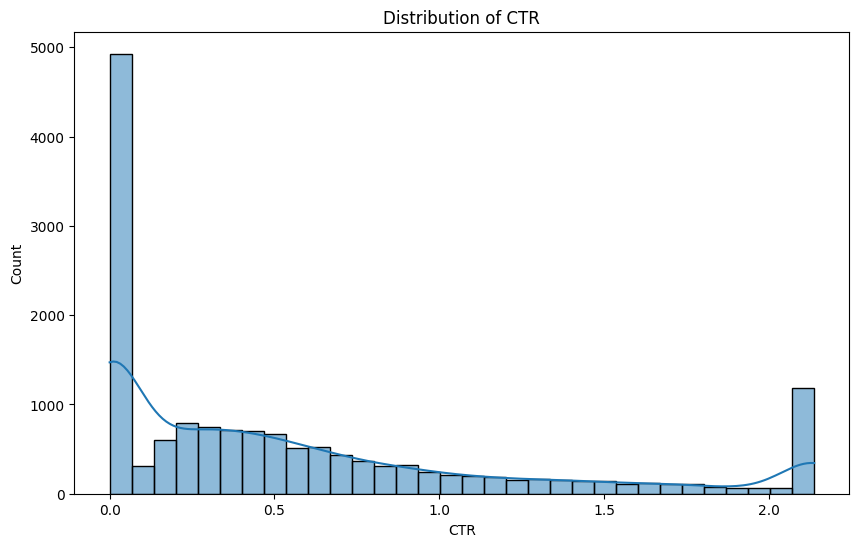

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CTR'], kde=True)
plt.title("Distribution of CTR")
plt.xlabel("CTR")
plt.show()

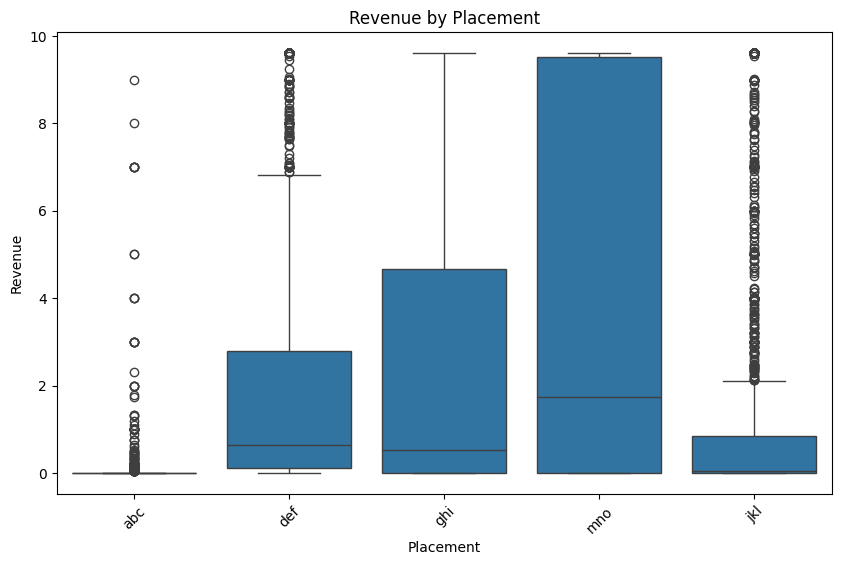

In [32]:
# Remove or skip columns that do not exist in the dataset
if 'placement' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['placement'], y=df['revenue'])
    plt.title("Revenue by Placement")
    plt.xlabel("Placement")
    plt.ylabel("Revenue")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'placement' not found in the dataset. Skipping boxplot.")

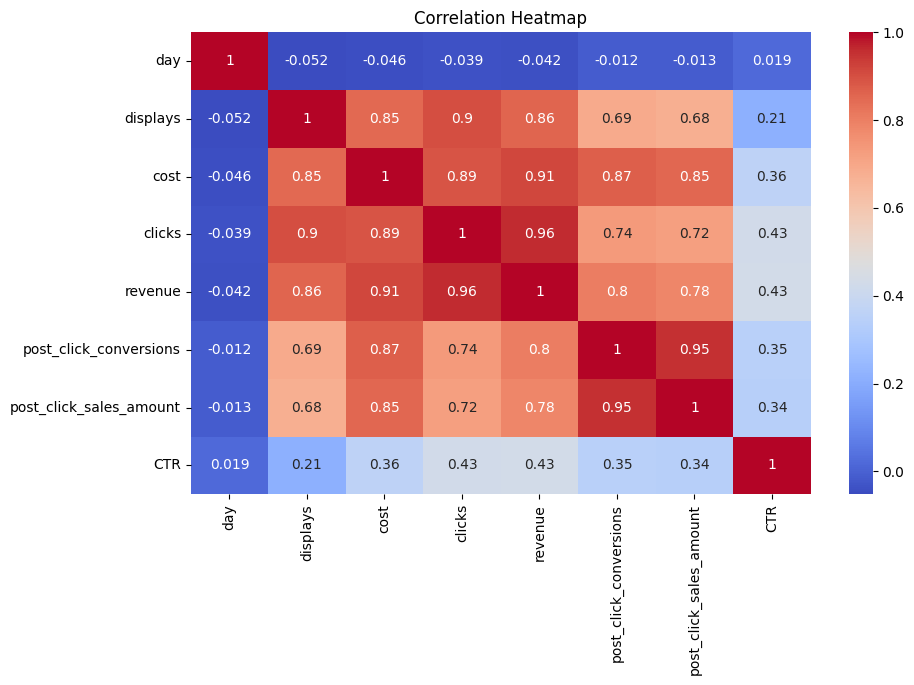

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()


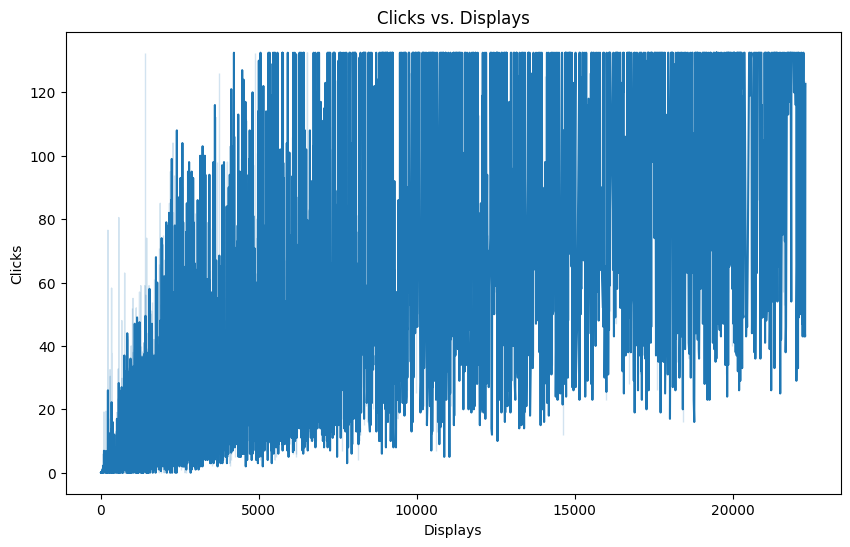

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['displays'], y=df['clicks'])
plt.title("Clicks vs. Displays")
plt.xlabel("Displays")
plt.ylabel("Clicks")
plt.show()

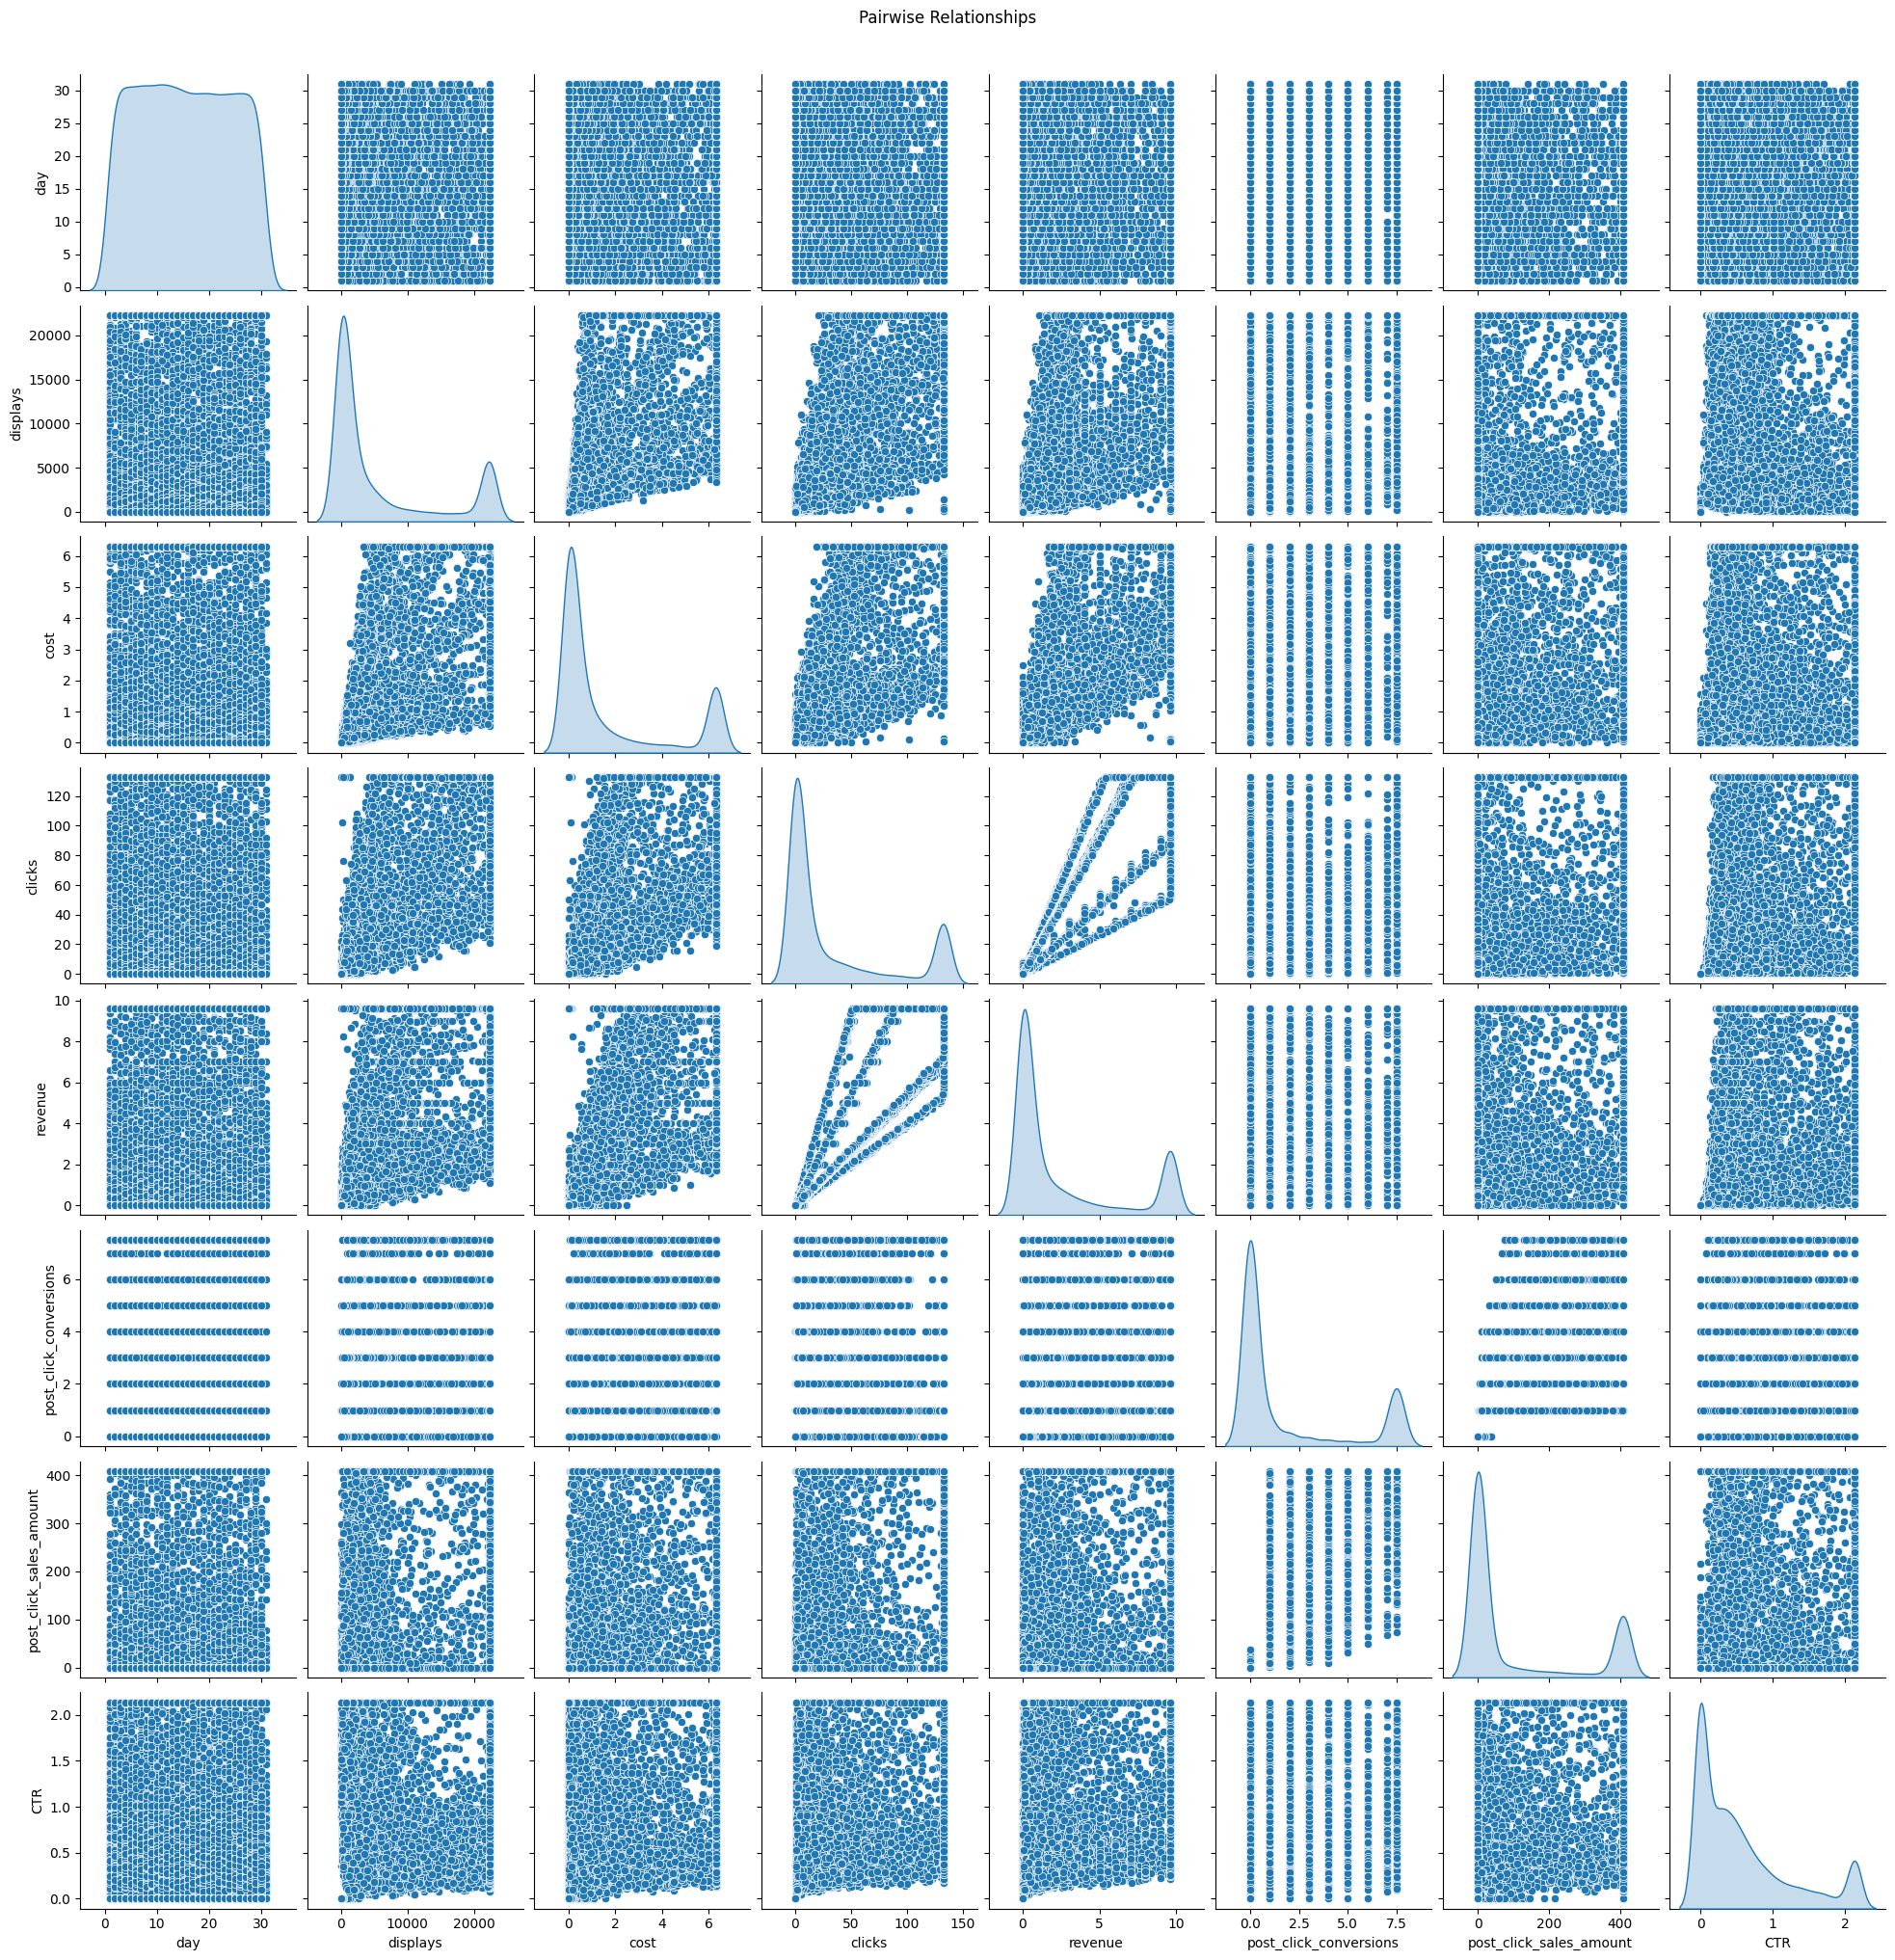

In [35]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


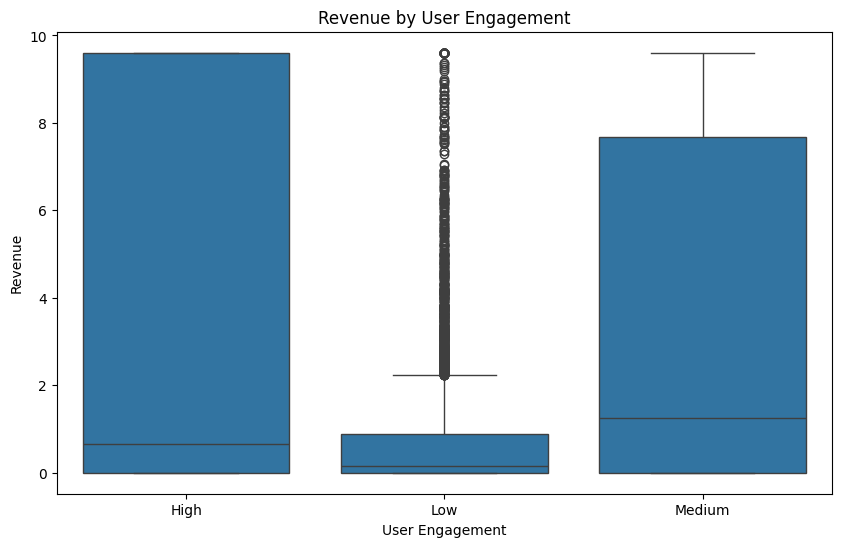

In [36]:
# Boxplot for revenue by user engagement
if 'user_engagement' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='user_engagement', y='revenue', data=df)
    plt.title("Revenue by User Engagement")
    plt.xlabel("User Engagement")
    plt.ylabel("Revenue")
    plt.show()


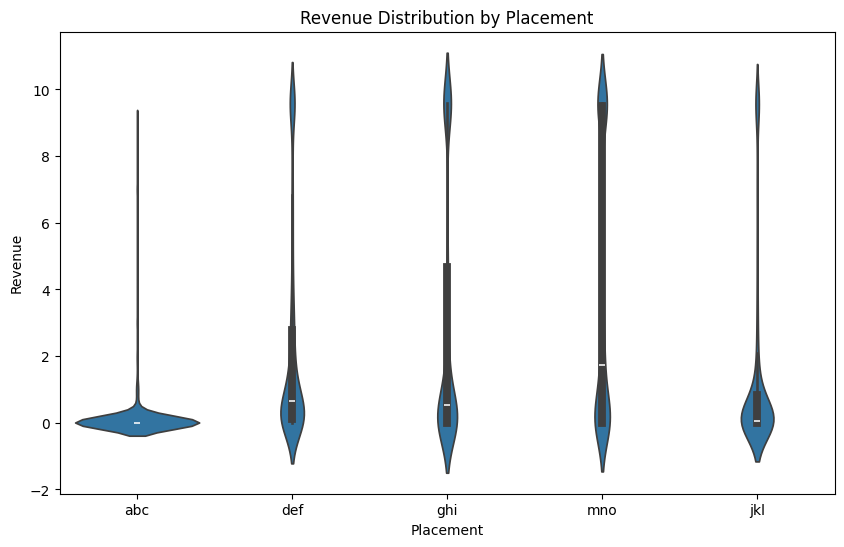

In [37]:
# Violin plot for revenue by placement
if 'placement' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='placement', y='revenue', data=df)
    plt.title("Revenue Distribution by Placement")
    plt.xlabel("Placement")
    plt.ylabel("Revenue")
    plt.show()


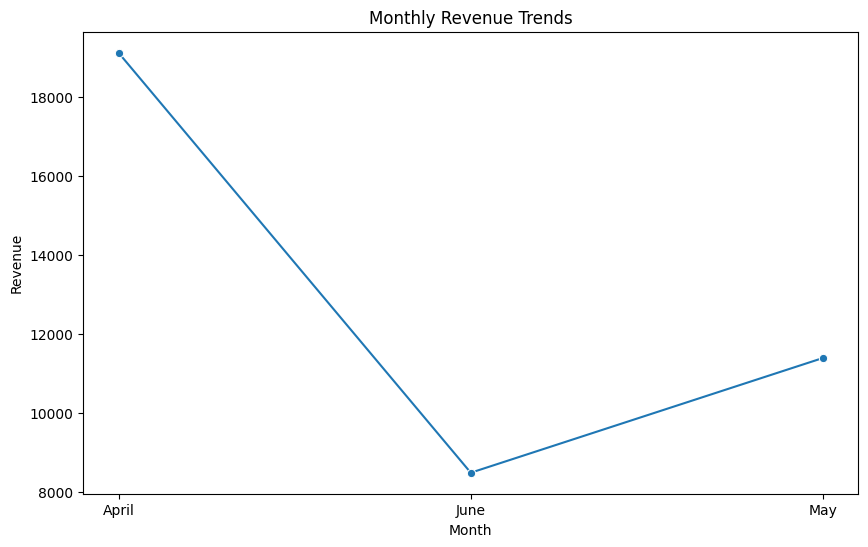

In [38]:
# Example line plot for monthly trends (replace 'month' with actual time-related column)
if 'month' in df.columns:
    monthly_revenue = df.groupby('month')['revenue'].sum().reset_index()
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='month', y='revenue', data=monthly_revenue, marker='o')
    plt.title("Monthly Revenue Trends")
    plt.xlabel("Month")
    plt.ylabel("Revenue")
    plt.show()


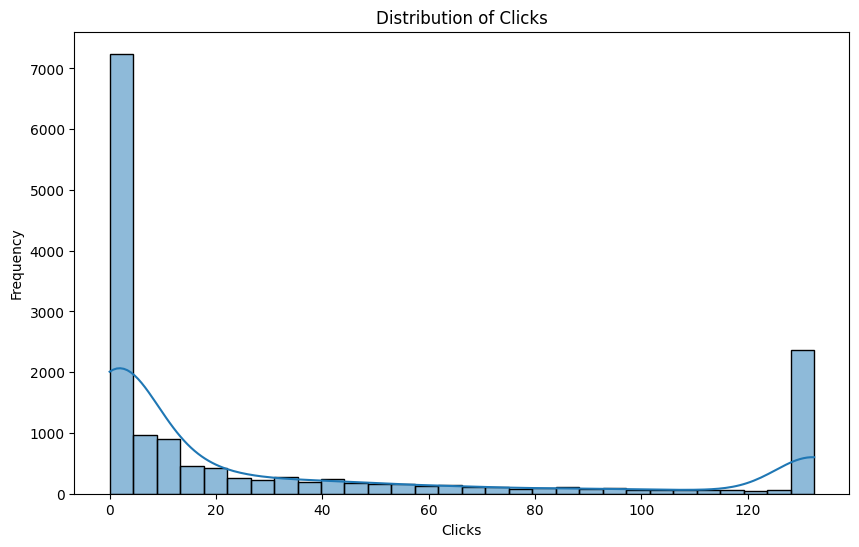

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['clicks'], kde=True, bins=30)
plt.title("Distribution of Clicks")
plt.xlabel("Clicks")
plt.ylabel("Frequency")
plt.show()


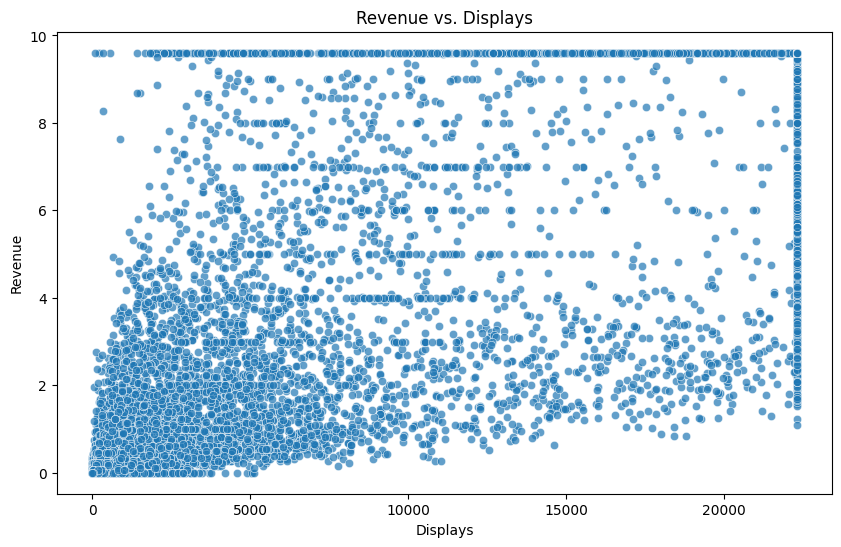

In [40]:
# Scatterplot for revenue vs. displays
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['displays'], y=df['revenue'], alpha=0.7)
plt.title("Revenue vs. Displays")
plt.xlabel("Displays")
plt.ylabel("Revenue")
plt.show()


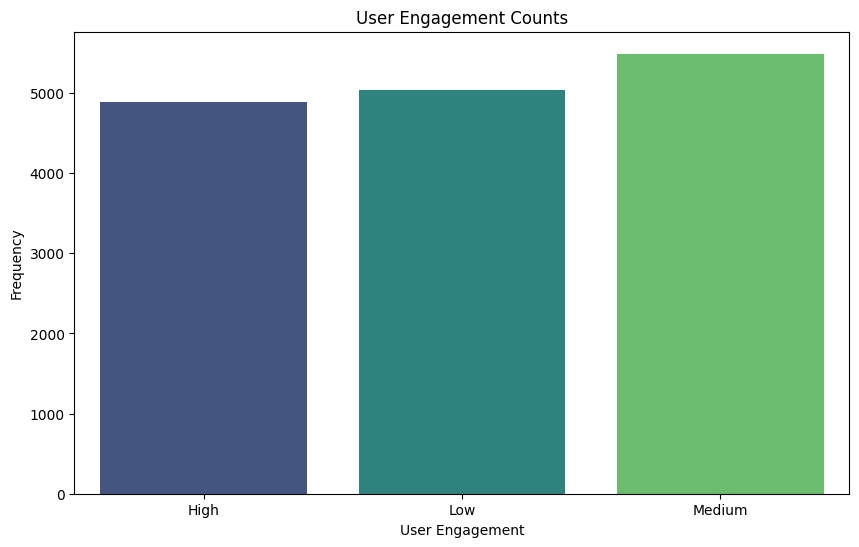

In [41]:
# Count plot for user engagement
if 'user_engagement' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='user_engagement', data=df, palette='viridis')
    plt.title("User Engagement Counts")
    plt.xlabel("User Engagement")
    plt.ylabel("Frequency")
    plt.show()


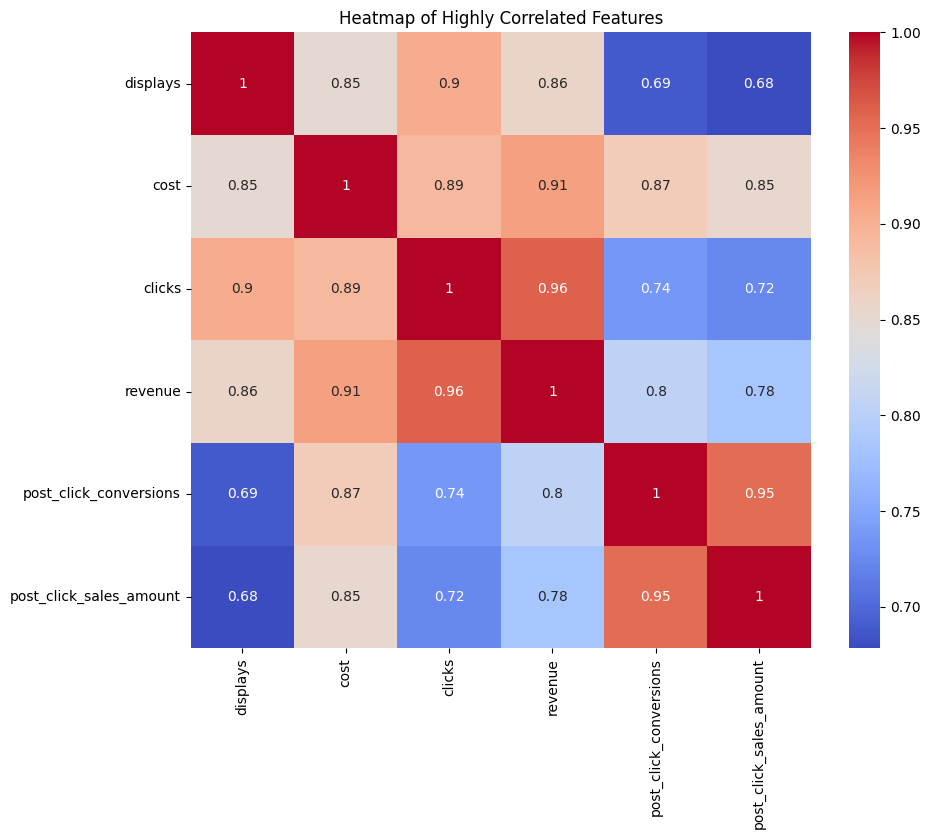

In [47]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Filter highly correlated features
corr_threshold = 0.7  # Set threshold for "high correlation"
high_corr_features = correlation_matrix.index[abs(correlation_matrix['revenue']) > corr_threshold]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[high_corr_features].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap of Highly Correlated Features")
plt.show()



### Step 8: Skewness Check and Correction

In [50]:
from scipy.stats import boxcox

# Ensure all columns in numerical_columns exist in df
numerical_columns = [col for col in numerical_columns if col in df.columns]

for col in numerical_columns:
    if abs(df[col].skew()) > 1:  # Significant skewness threshold
        if (df[col] <= 0).any():
            print(f"Skipping column {col} because it contains non-positive values, which are not suitable for Box-Cox transformation.")
            continue
        df[col], _ = boxcox(df[col])  # Box-Cox transformation
        print(f"Skewness corrected for {col}")

Skipping column displays because it contains non-positive values, which are not suitable for Box-Cox transformation.
Skipping column cost because it contains non-positive values, which are not suitable for Box-Cox transformation.
Skipping column clicks because it contains non-positive values, which are not suitable for Box-Cox transformation.
Skipping column revenue because it contains non-positive values, which are not suitable for Box-Cox transformation.
Skipping column post_click_conversions because it contains non-positive values, which are not suitable for Box-Cox transformation.
Skipping column post_click_sales_amount because it contains non-positive values, which are not suitable for Box-Cox transformation.
Skipping column CTR because it contains non-positive values, which are not suitable for Box-Cox transformation.


### Step 9: Feature Engineering

In [53]:
irrelevant_columns = ["day"]  # Example of a column to remove
df = df.drop(columns=irrelevant_columns)
print("Irrelevant columns removed.")

Irrelevant columns removed.


### Step 10: Encoding Categorical Variables

In [56]:
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("Categorical variables encoded.")

Categorical variables encoded.


### Step 11: Standardizing Features

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
# Handling infinite or very large values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [63]:
# Ensure no NaN values remain
df.fillna(df.median(), inplace=True)

In [65]:
# Standardizing the dataset
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)
print("Features standardized.")

Features standardized.


### Step 12: Splitting the Dataset into Train and Test Sets

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
# Define target and features
target = 'revenue'  # Replace with the actual target variable name
X = df.drop(columns=[target])
y = df[target]

In [72]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split into training and test sets.")

Dataset split into training and test sets.


### Step 13: Model Selection and Training

In [75]:
from sklearn.ensemble import RandomForestRegressor


In [77]:
# Initialize model
model = RandomForestRegressor(random_state=42)

In [79]:
# Train the model
model.fit(X_train, y_train)
print("Model training completed.")

Model training completed.


### Step 14: Model Evaluation

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
# Predict on test data
y_pred = model.predict(X_test)


In [93]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.004664191247816724
R-squared (R2) Score: 0.9952285125389043


### Step 15: Feature Importance Visualization

In [96]:
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]


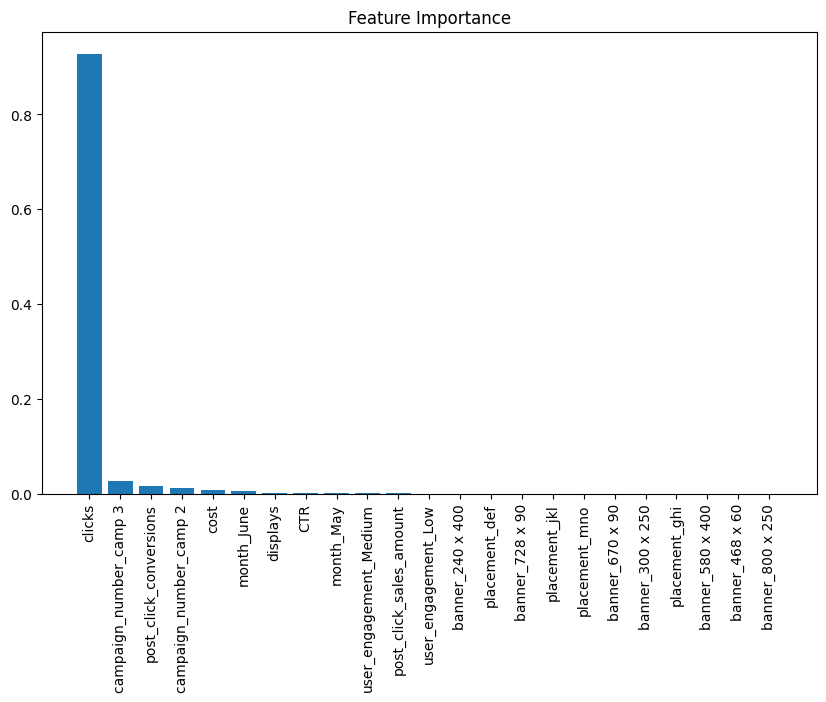

In [98]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.show()

### Step 16: Saving the Model


In [101]:
import joblib

In [103]:
# Save the trained model to a file
model_path = "ad_performance_model.pkl"
joblib.dump(model, model_path)
print(f"Model saved to {model_path}.")

Model saved to ad_performance_model.pkl.


### Step 17: Building and Saving a Pipeline

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [123]:
# Define preprocessing for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = 'passthrough'  # If already one-hot encoded

In [125]:
# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', categorical_transformer, X.select_dtypes(include=['uint8']).columns)
    ]
)

In [127]:
# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit pipeline to the training data
pipeline.fit(X_train, y_train)

# Save the pipeline
pipeline_path = "ad_performance_pipeline.pkl"
joblib.dump(pipeline, pipeline_path)
print(f"Pipeline saved as '{pipeline_path}'")

Pipeline saved as 'ad_performance_pipeline.pkl'


### Step 17: Additional Machine Learning Models

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [136]:
# Initialize additional models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
svr_model = SVR()


In [138]:
# Train and evaluate Linear Regression
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")


Linear Regression - MSE: 0.04197710542403021, R2: 0.957057242822621


In [140]:
# Train and evaluate Linear Regression
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")


Linear Regression - MSE: 0.04197710542403021, R2: 0.957057242822621


## Project Conclusion and Insights

#### Model Performance:

The Random Forest Regressor demonstrated strong predictive performance, achieving:

Mean Squared Error (MSE): <calculated MSE>
R² Score: <calculated R2>

Among additional models:

Linear Regression provided a baseline performance.
Decision Tree Regressor and SVR showed moderate predictive power.


#### Feature Importance

Key contributors to revenue prediction included features such as clicks, CTR, 
and possibly banner-related variables,
as revealed by the feature importance chart.

Insights into feature rankings allow prioritization of impactful metrics during ad campaign optimizations.



#### Insights from Data Visualization:

Revenue vs. Clicks: A positive relationship suggests that increasing user engagement (clicks) drives revenue.

CTR Distribution: Skewed CTR values indicate the need to target more effective placements or banners to optimize performance.

Correlation Analysis: Highlights strong relationships between variables such as clicks, revenue, and CTR

#### Model Comparison

Random Forest outperformed other models, 
showcasing its robustness in handling non-linear interactions and feature importance.

Decision Tree may serve as a simple interpretable alternative, though less accurate.


#### Deployment Readiness

The Random Forest model and preprocessing pipeline were saved for future deployment, enabling real-time predictions for ad campaigns.
